<a href="https://colab.research.google.com/github/sathizz7/Guvi_Task7/blob/main/_SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the dataset**

In [ ]:
data = pd.read_csv('Social_Network_Ads.csv')

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data['Age'].unique()

array([19, 35, 26, 27, 32, 25, 20, 18, 29, 47, 45, 46, 48, 49, 31, 21, 28,
       33, 30, 23, 24, 22, 59, 34, 39, 38, 37, 42, 40, 36, 41, 58, 55, 52,
       60, 56, 53, 50, 51, 57, 44, 43, 54])

In [ ]:
X = data.iloc[:,0:-1]
y = data.iloc[:,-1]

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain,Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.2 , random_state= 3)

In [ ]:
Xtrain

,User ID,Gender,Age,EstimatedSalary
239,15772073,Female,53,143000
188,15674206,Male,35,72000
240,15701537,Male,42,149000
23,15599081,Female,45,22000
343,15629739,Female,47,51000
...,...,...,...,...
256,15609637,Female,41,72000
131,15801247,Male,33,31000
249,15753102,Female,35,97000
152,15699247,Male,31,76000


In [ ]:
Xtest

,User ID,Gender,Age,EstimatedSalary
376,15596984,Female,46,74000
16,15733883,Male,47,25000
365,15807525,Female,59,29000
82,15709476,Male,20,49000
107,15789863,Male,27,89000
...,...,...,...,...
246,15638003,Female,35,50000
10,15570769,Female,26,80000
115,15689237,Male,40,57000
74,15592877,Male,32,18000


In [ ]:
Xtrain['Gender']

239    Female
188      Male
240      Male
23     Female
343    Female
        ...  
256    Female
131      Male
249    Female
152      Male
362    Female
Name: Gender, Length: 320, dtype: object

**Feature Scaling**

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse = False)


In [ ]:
gen1 = ohe.fit_transform(Xtrain[['Gender']])

In [ ]:
gen1 = pd.DataFrame(gen1)

In [ ]:
gen1

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
315,1.0,0.0
316,0.0,1.0
317,1.0,0.0
318,0.0,1.0


In [ ]:
Xtrain.drop('Gender', axis = 1, inplace = True)

In [ ]:
Xtrain.reset_index(drop = True , inplace = True)

In [ ]:
Xtrain = pd.concat([Xtrain, gen1], axis = 1)

In [ ]:
Xtrain.columns = ['UserID',	'Age',	'EstimatedSalary','sex1','sex2']

In [ ]:
Xtrain

,UserID,Age,EstimatedSalary,sex1,sex2
0,15772073,53,143000,1.0,0.0
1,15674206,35,72000,0.0,1.0
2,15701537,42,149000,0.0,1.0
3,15599081,45,22000,1.0,0.0
4,15629739,47,51000,1.0,0.0
...,...,...,...,...,...
315,15609637,41,72000,1.0,0.0
316,15801247,33,31000,0.0,1.0
317,15753102,35,97000,1.0,0.0
318,15699247,31,76000,0.0,1.0


In [ ]:
gen2 = ohe.fit_transform(Xtest[['Gender']])

In [ ]:
gen2 = pd.DataFrame(gen2)

In [ ]:
gen2

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
75,1.0,0.0
76,1.0,0.0
77,0.0,1.0
78,0.0,1.0


In [ ]:
Xtest.drop('Gender', axis = 1, inplace = True)

In [ ]:
Xtest.reset_index(drop = True , inplace = True)

In [ ]:
Xtest = pd.concat([Xtest, gen2], axis = 1)

In [ ]:
Xtest.columns = ['UserID',	'Age',	'EstimatedSalary','sex1','sex2']

In [ ]:
Xtest

,UserID,Age,EstimatedSalary,sex1,sex2
0,15596984,46,74000,1.0,0.0
1,15733883,47,25000,0.0,1.0
2,15807525,59,29000,1.0,0.0
3,15709476,20,49000,0.0,1.0
4,15789863,27,89000,0.0,1.0
...,...,...,...,...,...
75,15638003,35,50000,1.0,0.0
76,15570769,26,80000,1.0,0.0
77,15689237,40,57000,0.0,1.0
78,15592877,32,18000,0.0,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SS =StandardScaler()
Xtrain = SS.fit_transform(Xtrain)
Xtest = SS.transform(Xtest)

**Fitting SVM to the Training set**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(Xtrain,ytrain)

SVC()

In [ ]:
print(svc.score(Xtrain,ytrain))
print(svc.score(Xtest,ytest))

0.90625
0.9


**Predicting the Test set results**

In [ ]:
ypred = svc.predict(Xtest)
ypred

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_roc_curve

confusion_matrix(ytest, ypred)

array([[50,  5],
       [ 3, 22]])

In [ ]:
accuracy_score(ytest, ypred)

0.9

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


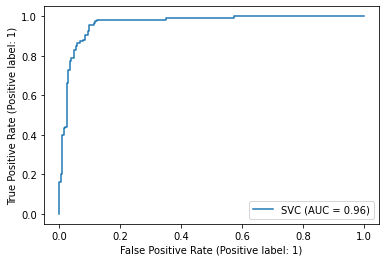

In [ ]:
plot_roc_curve(svc,Xtrain,ytrain)

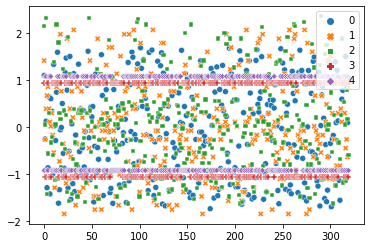

In [ ]:
sns.scatterplot(data = Xtrain)

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


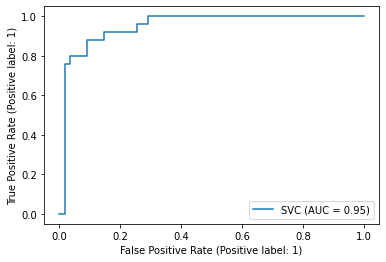

In [ ]:
plot_roc_curve(svc,Xtest,ytest)

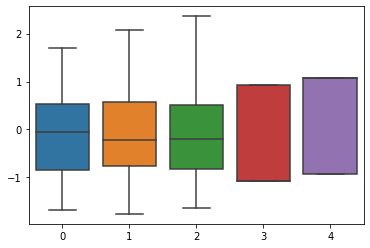

In [ ]:
sns.boxplot(data = Xtest)